Importing Libraries

In [ ]:
# importing all required libraries
from keras.datasets import cifar10
import pickle
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense , Dropout, Flatten
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2D,MaxPooling2D
from matplotlib import pyplot
import timeit

Using TensorFlow backend.


Helper functions to implement MLP, CNN1, CNN2 Networks

In [ ]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # split 20% of train data from the whole data
    X_train,X_test,y_train, y_test = train_test_split( trainX, trainY, test_size=0.8, random_state=42)
    print(X_train.shape)
    print(y_train)
    print(testY.shape)
    # Spliting the test data into 50-50% for validation and test 
    X_test_train,X_val_test,y_test_train, y_val_test = train_test_split( testX, testY, test_size=0.5, random_state=42)
    print(X_test_train.shape)
    print(X_val_test.shape)
    print(y_test_train.shape)
    print(y_val_test.shape)
    return X_train, y_train, X_test_train,X_val_test,y_test_train, y_val_test
# scale pixels
def prep_pixels(train, test_test,test_val):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test_test.astype('float32') 
    test_norm_val = test_val.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    test_norm_val = test_norm_val/255.0
	  # return normalized images
    return train_norm , test_norm , test_norm_val
# defining model for MLP network 
def define_model_mlp(X_train,n):
	 # define model for 2 layers 
    model_mlp = Sequential()
    model_mlp.add(Flatten())
    model_mlp.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #define model for 3 layers
    model_mlp3 = Sequential()
    model_mlp3.add(Flatten())
    model_mlp3.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp3.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp3.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model for 4 layers
    model_mlp4 = Sequential()
    model_mlp4.add(Flatten())
    model_mlp4.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp4.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp4.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp4.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model for 5 layers
    model_mlp5 = Sequential()
    model_mlp5.add(Flatten())
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp5.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model_mlp,model_mlp3,model_mlp4,model_mlp5

def define_model_cnn(X_train):
    # CNN model for Frist CNN network
    model_cnn = Sequential()
    model_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
    model_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(512,activation='sigmoid'))
    model_cnn.add(Dense(512,activation='sigmoid'))
    model_cnn.add(Dense(10, activation='softmax'))
    model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # CNN model for Second CNN network 
    model_cnn1 = Sequential()
    model_cnn1.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
    model_cnn1.add(MaxPooling2D(pool_size=2))
    model_cnn1.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model_cnn1.add(MaxPooling2D(pool_size=2))
    model_cnn1.add(Flatten())
    model_cnn1.add(Dense(512,activation='sigmoid'))
    model_cnn1.add(Dropout(0.2))
    model_cnn1.add(Dense(512,activation='sigmoid'))
    model_cnn1.add(Dropout(0.2))
    model_cnn1.add(Dense(10, activation='softmax'))
    model_cnn1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
       
    return model_cnn,model_cnn1



Function Definations to train and test the Network models

In [ ]:
# defining MLP Model for Train and Test, this is for 4 types of layers= 2,3,4,5 and 5 types of neurons = [64,128,256,512,1024] passing into the network 
def run_mlp():
    
    nofneurons = [64,128,256,512,1024] 
    # load dataset
    trainX, trainY,  testX_test,testX_val, testY_test, testY_val = load_dataset()
    # prepare normalize data
    trainX, testX_test,testX_val = prep_pixels(trainX, testX_test,testX_val)
    # define model
    for i in range(len(nofneurons)):
      accuracy = []
      accur_avg =[]
      score = []
      val_accury =[]
      model_mlp, model_mlp3,model_mlp4,model_mlp5 = define_model_mlp(trainX,nofneurons[i])
      model = [model_mlp, model_mlp3,model_mlp4,model_mlp5]
      # fit model
      for j in range(len(model)):
        history_mlp = model[j].fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX_val, testY_val), verbose=1)
        accuracy = history_mlp.history['accuracy']
        val_accur = history_mlp.history['val_accuracy']
        model[j].summary()
        accur= np.mean(accuracy)
        val_accur = np.mean(val_accur)
        accur_avg.append(accur)
        val_accury.append(val_accur)
        #score.append(score)
      print("Average Accuracy for one no of neuron : ",accur_avg)
      print("Average Val Accuracy for one no of neuron :", val_accury)
      pyplot.title('Accuracy')
      pyplot.plot(accur_avg, label='train')
      pyplot.plot(val_accury, label='test')
      pyplot.legend()
      pyplot.show()
      
    return accur_avg ,val_accury,score
# define model for 2 layers and only one neuron is passed as asked in the question, also calculating Train and test accuracy for the MLP 
def mlp_score():
    trainX, trainY, testX_test,testX_val, testY_test, testY_val = load_dataset()
    # prepare pixel data
    trainX, testX_test,testX_val = prep_pixels(trainX, testX_test,testX_val)
    model_mlp, model_mlp3,model_mlp4,model_mlp5 = define_model_mlp(trainX,512)
    #fitting the model on train data and validating on 50% of test data
    history_mlp = model_mlp.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX_val, testY_val), verbose=1)
    model_mlp.summary()
    # calculating test accuracy on 50% of test data
    score = model_mlp.evaluate(testX_test,testY_test, verbose=1)
    print('\n', 'Test accuracy of MLP:', score[1])
    yhat = model_mlp.predict(testX_test)
    print('Predicted of MLP: %s (class=%d)' % (yhat, np.argmax(yhat)))
    return score
# defining function to run train and test data on the first type of CNN model to calculate train and test accuracies
def run_cnn():
  # load dataset

    trainX_c, trainY_c, testX_test_c,testX_val_c, testY_test_c,textY_val_c = load_dataset()
    print(trainX_c.shape)
    print(trainY_c.shape)
    # prepare pixel data
    trainX_c, testX_test_c,testX_val_c = prep_pixels(trainX_c, testX_test_c,testX_val_c)
    # define model
    model_cnn,model_cnn1 = define_model_cnn(trainX_c)
    start_CNN1 = timeit.default_timer()
     #fitting the model on train data and validating on 50% of test data
    history_cnn = model_cnn.fit(trainX_c, trainY_c, epochs=5, batch_size=32, validation_data=(testX_val_c, textY_val_c), verbose=1)
    stop_CNN1 = timeit.default_timer()
    model_cnn.summary()
    accuracy_cnn = history_cnn.history['accuracy']
    Time_CNN1 = stop_CNN1-start_CNN1
    print("Time Taken for CNN1",Time_CNN1)
    # calculating test accuracy on 50% of test data
    score_cnn = model_cnn.evaluate(testX_test_c,testY_test_c, verbose=1)
    print('\n', 'Test accuracy of CNN:', score_cnn[1])
    yhat_c = model_cnn.predict(testX_test_c)
    print('Predicted of CNN: %s (class=%d)' % (yhat_c, np.argmax(yhat_c)))
    pyplot.title('Accuracy')
    pyplot.plot(accuracy_cnn, label='train')
    pyplot.plot(score_cnn, label='test')
    pyplot.legend()
    pyplot.show()

# defining function to run train and test data on the  second type of CNN model to calculate train and test accuracies
def run_cnn1():
  # load dataset
    trainX_c1, trainY_c1, testX_test_c1,testX_val_c1, testY_test_c1,textY_val_c1 = load_dataset()
    print(trainX_c1.shape)
    print(trainY_c1.shape)
    # prepare pixel data
    trainX_c1, testX_test_c1,testX_val_c1 = prep_pixels(trainX_c1, testX_test_c1,testX_val_c1)
    # define model
    model_cnn,model_cnn1 = define_model_cnn(trainX_c1)
     # #fitting the model on train data and validating on 50% of test data
    start_CNN2 = timeit.default_timer()
    history_cnn1 = model_cnn1.fit(trainX_c1, trainY_c1, epochs=5, batch_size=8, validation_data=(testX_val_c1, textY_val_c1), verbose=1)
    stop_CNN2 = timeit.default_timer()
    model_cnn1.summary()
    accuracy_cnn1 = history_cnn1.history['accuracy']
    Time_CNN2 = stop_CNN2 - start_CNN2
    print("Time for CNN2",Time_CNN2)
    # calculating test accuracy on 50% of test data
    score_cnn1 = model_cnn1.evaluate(testX_test_c1,testY_test_c1, verbose=1)
    print('\n', 'Test accuracy of CNN 1:', score_cnn1[1])
    yhat_c1 = model_cnn1.predict(testX_test_c1)
    print('Predicted of CNN 1: %s (class=%d)' % (yhat_c1, np.argmax(yhat_c1)))
    pyplot.title('Accuracy')
    pyplot.plot(accuracy_cnn1, label='train')
    pyplot.plot(score_cnn1, label='test')
    pyplot.legend()
    pyplot.show()



Run MLP Function Call

(10000, 32, 32, 3)
(10000, 1)
(10000, 1)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 1)
(5000, 1)
Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 125us/step - loss: 2.1173 - accuracy: 0.2395 - val_loss: 1.9861 - val_accuracy: 0.2918
Epoch 2/5
10000/10000 [==============================] - 1s 118us/step - loss: 1.9396 - accuracy: 0.3160 - val_loss: 1.8870 - val_accuracy: 0.3406
Epoch 3/5
10000/10000 [==============================] - 1s 116us/step - loss: 1.8682 - accuracy: 0.3458 - val_loss: 1.8745 - val_accuracy: 0.3328
Epoch 4/5
10000/10000 [==============================] - 1s 116us/step - loss: 1.8347 - accuracy: 0.3504 - val_loss: 1.8448 - val_accuracy: 0.3394
Epoch 5/5
10000/10000 [==============================] - 1s 118us/step - loss: 1.8002 - accuracy: 0.3693 - val_loss: 1.8142 - val_accuracy: 0.3554
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 O

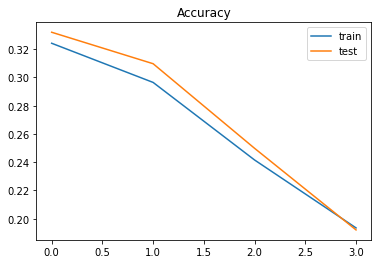

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 124us/step - loss: 2.0436 - accuracy: 0.2659 - val_loss: 1.9431 - val_accuracy: 0.2922
Epoch 2/5
10000/10000 [==============================] - 1s 118us/step - loss: 1.8847 - accuracy: 0.3301 - val_loss: 1.8570 - val_accuracy: 0.3376
Epoch 3/5
10000/10000 [==============================] - 1s 119us/step - loss: 1.8337 - accuracy: 0.3519 - val_loss: 1.8127 - val_accuracy: 0.3510
Epoch 4/5
10000/10000 [==============================] - 1s 119us/step - loss: 1.7897 - accuracy: 0.3642 - val_loss: 1.7898 - val_accuracy: 0.3608
Epoch 5/5
10000/10000 [==============================] - 1s 120us/step - loss: 1.7679 - accuracy: 0.3692 - val_loss: 1.7874 - val_accuracy: 0.3668
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 3072)              0     

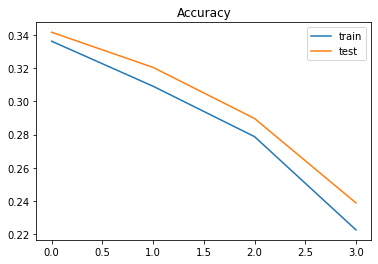

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 144us/step - loss: 2.0431 - accuracy: 0.2578 - val_loss: 1.9378 - val_accuracy: 0.2876
Epoch 2/5
10000/10000 [==============================] - 1s 134us/step - loss: 1.8916 - accuracy: 0.3175 - val_loss: 1.8406 - val_accuracy: 0.3448
Epoch 3/5
10000/10000 [==============================] - 1s 132us/step - loss: 1.8325 - accuracy: 0.3458 - val_loss: 1.8015 - val_accuracy: 0.3506
Epoch 4/5
10000/10000 [==============================] - 1s 134us/step - loss: 1.7935 - accuracy: 0.3583 - val_loss: 1.8338 - val_accuracy: 0.3382
Epoch 5/5
10000/10000 [==============================] - 1s 132us/step - loss: 1.7547 - accuracy: 0.3795 - val_loss: 1.7968 - val_accuracy: 0.3556
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 3072)              0     

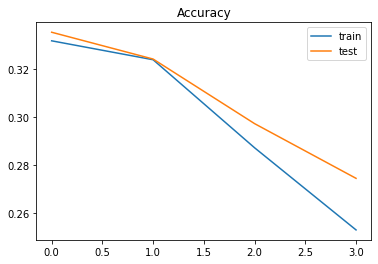

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 162us/step - loss: 2.0538 - accuracy: 0.2662 - val_loss: 1.9073 - val_accuracy: 0.3116
Epoch 2/5
10000/10000 [==============================] - 2s 153us/step - loss: 1.8762 - accuracy: 0.3339 - val_loss: 1.8686 - val_accuracy: 0.3468
Epoch 3/5
10000/10000 [==============================] - 2s 154us/step - loss: 1.8254 - accuracy: 0.3474 - val_loss: 1.8413 - val_accuracy: 0.3418
Epoch 4/5
10000/10000 [==============================] - 2s 155us/step - loss: 1.7778 - accuracy: 0.3657 - val_loss: 1.7545 - val_accuracy: 0.3712
Epoch 5/5
10000/10000 [==============================] - 2s 155us/step - loss: 1.7238 - accuracy: 0.3870 - val_loss: 1.8120 - val_accuracy: 0.3516
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 3072)              0     

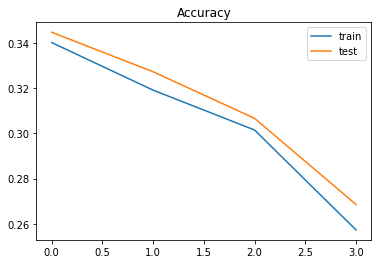

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 212us/step - loss: 2.1005 - accuracy: 0.2583 - val_loss: 1.9200 - val_accuracy: 0.3208
Epoch 2/5
10000/10000 [==============================] - 2s 203us/step - loss: 1.8914 - accuracy: 0.3180 - val_loss: 1.8874 - val_accuracy: 0.3272
Epoch 3/5
10000/10000 [==============================] - 2s 203us/step - loss: 1.8262 - accuracy: 0.3433 - val_loss: 1.8184 - val_accuracy: 0.3410
Epoch 4/5
10000/10000 [==============================] - 2s 202us/step - loss: 1.7816 - accuracy: 0.3618 - val_loss: 1.7796 - val_accuracy: 0.3488
Epoch 5/5
10000/10000 [==============================] - 2s 204us/step - loss: 1.7431 - accuracy: 0.3733 - val_loss: 1.7685 - val_accuracy: 0.3726
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         (None, 3072)              0     

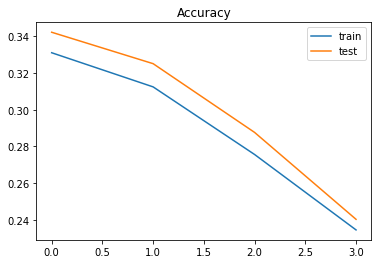

([0.33093998, 0.31238002, 0.27564, 0.23463997],
 [0.3420799970626831,
  0.3249999940395355,
  0.2876399964094162,
  0.24040000140666962],
 [])

In [ ]:
run_mlp()

In [ ]:
mlp_score()

(10000, 32, 32, 3)
[[3]
 [0]
 [9]
 ...
 [8]
 [8]
 [8]]
(10000, 1)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 1)
(5000, 1)
Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 161us/step - loss: 2.1043 - accuracy: 0.2447 - val_loss: 1.9336 - val_accuracy: 0.3010
Epoch 2/5
10000/10000 [==============================] - 2s 153us/step - loss: 1.8923 - accuracy: 0.3208 - val_loss: 1.8434 - val_accuracy: 0.3376
Epoch 3/5
10000/10000 [==============================] - 2s 153us/step - loss: 1.8352 - accuracy: 0.3408 - val_loss: 1.8962 - val_accuracy: 0.3094
Epoch 4/5
10000/10000 [==============================] - 2s 153us/step - loss: 1.7866 - accuracy: 0.3668 - val_loss: 1.8422 - val_accuracy: 0.3412
Epoch 5/5
10000/10000 [==============================] - 2s 151us/step - loss: 1.7428 - accuracy: 0.3766 - val_loss: 1.7637 - val_accuracy: 0.3576
Model: "sequential_49"
_________________________________________________________________
Layer

[1.7731193008422852, 0.3610000014305115]

(10000, 32, 32, 3)
(10000, 1)
(10000, 1)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 1)
(5000, 1)
(10000, 32, 32, 3)
(10000, 1)
Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 16s 2ms/step - loss: 1.7595 - accuracy: 0.3485 - val_loss: 1.4983 - val_accuracy: 0.4574
Epoch 2/5
10000/10000 [==============================] - 11s 1ms/step - loss: 1.3709 - accuracy: 0.5020 - val_loss: 1.3791 - val_accuracy: 0.5054
Epoch 3/5
10000/10000 [==============================] - 11s 1ms/step - loss: 1.0768 - accuracy: 0.6172 - val_loss: 1.3297 - val_accuracy: 0.5386
Epoch 4/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.7462 - accuracy: 0.7382 - val_loss: 1.4060 - val_accuracy: 0.5280
Epoch 5/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.3778 - accuracy: 0.8797 - val_loss: 1.5186 - val_accuracy: 0.5426
Model: "sequential_25"
_________________________________________________________________
Layer

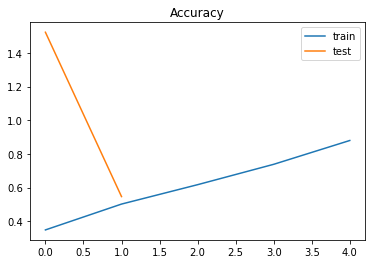

In [ ]:
run_cnn()

(10000, 32, 32, 3)
(10000, 1)
(10000, 1)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 1)
(5000, 1)
(10000, 32, 32, 3)
(10000, 1)
Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 7s 743us/step - loss: 1.8850 - accuracy: 0.3049 - val_loss: 1.6552 - val_accuracy: 0.3940
Epoch 2/5
10000/10000 [==============================] - 7s 726us/step - loss: 1.5049 - accuracy: 0.4516 - val_loss: 1.3736 - val_accuracy: 0.4950
Epoch 3/5
10000/10000 [==============================] - 7s 717us/step - loss: 1.3416 - accuracy: 0.5133 - val_loss: 1.3284 - val_accuracy: 0.5132
Epoch 4/5
10000/10000 [==============================] - 7s 720us/step - loss: 1.2010 - accuracy: 0.5600 - val_loss: 1.2511 - val_accuracy: 0.5540
Epoch 5/5
10000/10000 [==============================] - 7s 718us/step - loss: 1.0592 - accuracy: 0.6164 - val_loss: 1.2409 - val_accuracy: 0.5594
Model: "sequential_28"
_________________________________________________________________


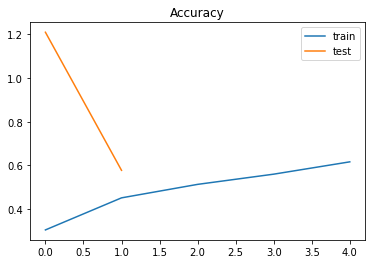

In [ ]:
run_cnn1()